# Fouille données

In [17]:
!pip install pandas numpy matplotlib seaborn folium scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from collections import Counter

%matplotlib inline
sns.set(style="whitegrid")

In [4]:
# Chargement du fichier
# on_bad_lines='skip' permet de sauter les lignes mal formées sans planter
# On enlève engine='python' car le moteur par défaut (C) est souvent plus tolérant

df = pd.read_csv('flickr_data2.csv', on_bad_lines='skip')

print("Données brutes :")
display(df.head())

Données brutes :


C:\Users\jerom\AppData\Local\Temp\ipykernel_22776\831863605.py:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flickr_data2.csv', on_bad_lines='skip')


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN


In [13]:
print("Colonnes du DataFrame :")
print(df.columns.tolist())
print("\nInfo du DataFrame :")
df.info()

Colonnes du DataFrame :
['id', ' user', ' lat', ' long', ' tags', ' title', ' date_taken_minute', ' date_taken_hour', ' date_taken_day', ' date_taken_month', ' date_taken_year', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']

Info du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      42

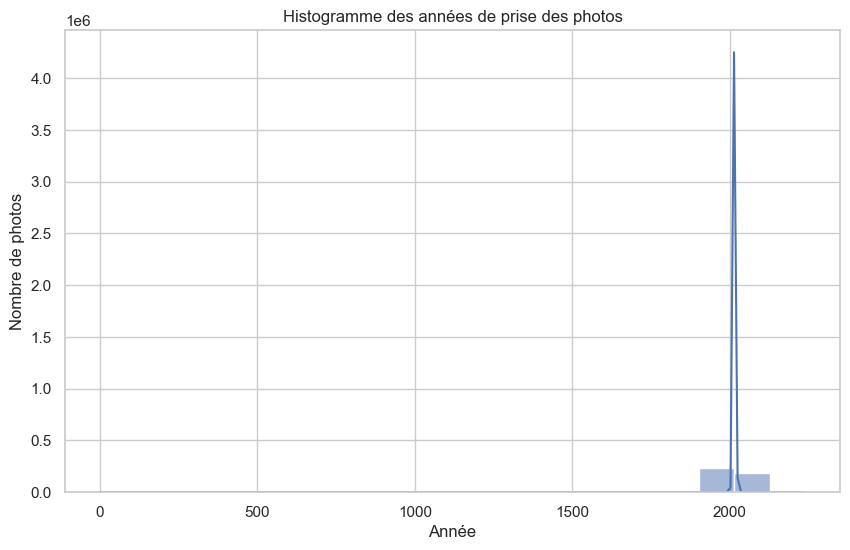

In [14]:
# Histogramme de la colonne année (date_taken_year)
plt.figure(figsize=(10, 6))
sns.histplot(df[' date_taken_year'], bins=20, kde=True)
plt.title('Histogramme des années de prise des photos')
plt.xlabel('Année')
plt.ylabel('Nombre de photos')
plt.show()

In [15]:
# Vérifier la plage des années
print("Année minimale :", df[' date_taken_year'].min())
print("Année maximale :", df[' date_taken_year'].max())
print("Années uniques :", sorted(df[' date_taken_year'].unique()))

Année minimale : 1
Année maximale : 2238
Années uniques : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 25, 1926, 1930, 1935, 1938, 1957, 1965, 1966, 1968, 1969, 1970, 1972, 1973, 1974, 1976, 1977, 1979, 1980, 1981, 1982, 1983, 1985, 1988, 1989, 1991, 1993, 1995, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2238]


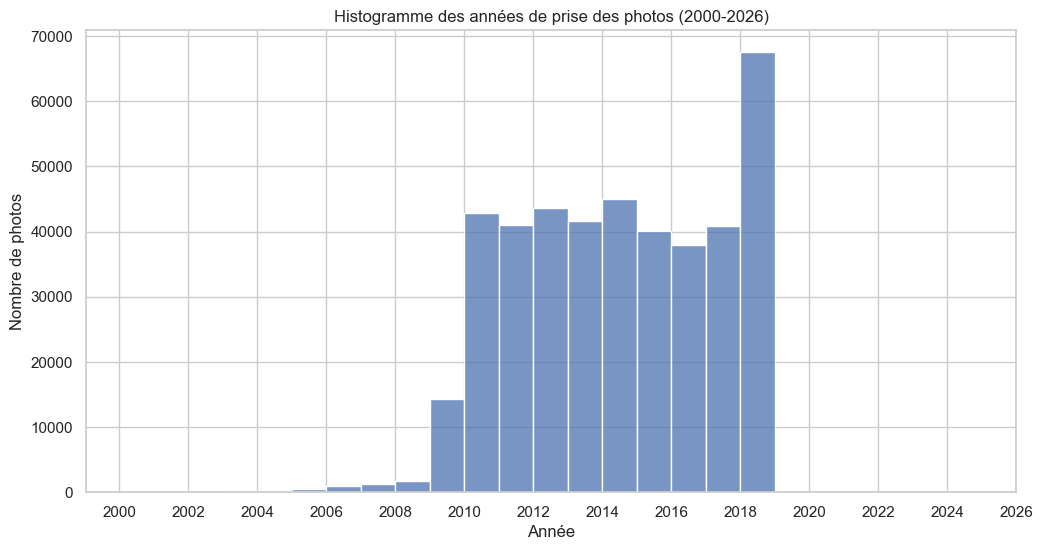

In [16]:
# Filtrer les données pour les années entre 2000 et 2026
df_filtered = df[(df[' date_taken_year'] >= 2000) & (df[' date_taken_year'] <= 2026)]

# Histogramme précis des années filtrées
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered[' date_taken_year'], bins=range(2000, 2027), binwidth=1)
plt.title('Histogramme des années de prise des photos (2000-2026)')
plt.xlabel('Année')
plt.ylabel('Nombre de photos')
plt.xticks(range(2000, 2027, 2))  # Étiquettes tous les 2 ans pour lisibilité
plt.show()

In [5]:
# Statistiques descriptives des colonnes numériques
print("Statistiques descriptives :")
display(df.describe())

# Nombre de valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())

Statistiques descriptives :


,id,lat,long,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,4.202400e+05,420240.000000,420240.000000,420239.000000,420240.000000,420240.000000,420240.000000,420240.000000,420238.000000,420240.000000,420239.000000,142.000000,0.0,2.0
mean,2.002697e+10,45.768173,4.839672,30.068559,14.746695,15.456813,7.000493,2013.294256,16.398738,6.698277,2013.648624,1958.880282,NaN,2012.0
std,1.411384e+10,0.028575,0.031619,39.880117,6.583236,9.637870,4.611831,37.141359,8.450967,4.672163,37.006109,331.444924,NaN,0.0
min,3.066675e+08,45.655200,4.720312,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.000000,NaN,2012.0
25%,7.094503e+09,45.757613,4.826202,14.000000,12.000000,8.000000,4.000000,2012.000000,9.000000,4.000000,2012.000000,2013.000000,NaN,2012.0
50%,1.548087e+10,45.763152,4.832183,30.000000,15.000000,15.000000,7.000000,2014.000000,17.000000,7.000000,2014.000000,2016.000000,NaN,2012.0
75%,3.145886e+10,45.773509,4.846558,45.000000,18.000000,23.000000,10.000000,2017.000000,24.000000,10.000000,2017.000000,2016.000000,NaN,2012.0
max,4.914809e+10,45.854950,5.006709,2019.000000,2013.000000,2013.000000,2011.000000,2238.000000,31.000000,2011.000000,2019.000000,2019.000000,NaN,2012.0



Valeurs manquantes par colonne :


id                          0
 user                       0
 lat                        0
 long                       0
 tags                  103510
 title                  38329
 date_taken_minute          1
 date_taken_hour            0
 date_taken_day             0
 date_taken_month           0
 date_taken_year            0
 date_upload_minute        12
 date_upload_hour           2
 date_upload_day            2
 date_upload_month          0
 date_upload_year           1
Unnamed: 16            420098
Unnamed: 17            420240
Unnamed: 18            420238
dtype: int64

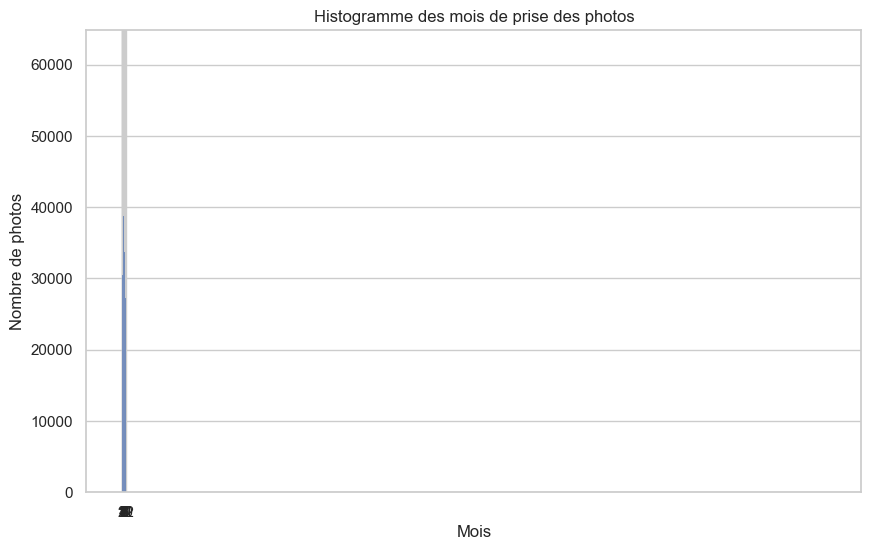

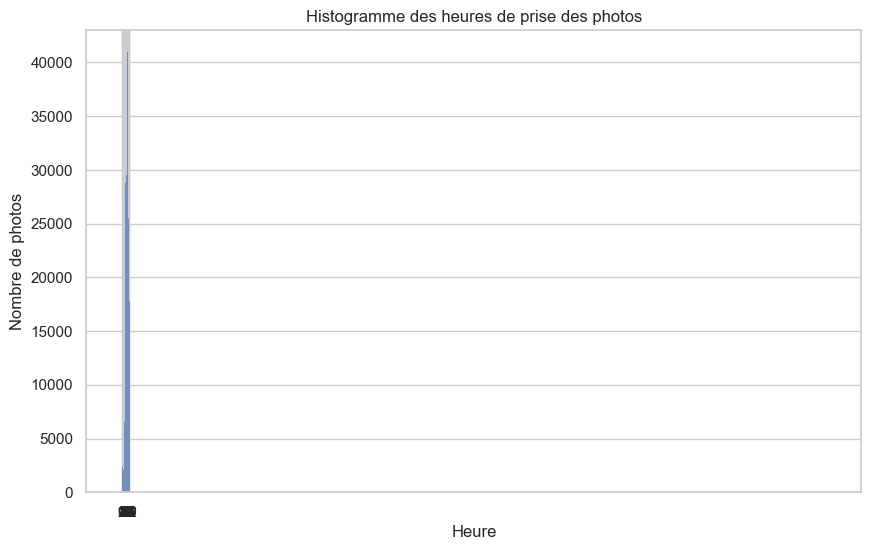

In [6]:
# Histogramme des mois de prise des photos
plt.figure(figsize=(10, 6))
sns.histplot(df[' date_taken_month'], bins=12, binwidth=1)
plt.title('Histogramme des mois de prise des photos')
plt.xlabel('Mois')
plt.ylabel('Nombre de photos')
plt.xticks(range(1, 13))
plt.show()

# Histogramme des heures de prise des photos
plt.figure(figsize=(10, 6))
sns.histplot(df[' date_taken_hour'], bins=24, binwidth=1)
plt.title('Histogramme des heures de prise des photos')
plt.xlabel('Heure')
plt.ylabel('Nombre de photos')
plt.xticks(range(0, 24, 2))
plt.show()

In [ ]:
# Boxplot des années pour détecter les outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[' date_taken_year'])
plt.title('Boxplot des années de prise des photos')
plt.xlabel('Année')
plt.show()

# Scatter plot des latitudes et longitudes (échantillon pour performance)
sample_df = df.sample(n=10000, random_state=42)  # Échantillon de 10 000 points
plt.figure(figsize=(10, 8))
plt.scatter(sample_df[' long'], sample_df[' lat'], alpha=0.5, s=1)
plt.title('Scatter plot des localisations (échantillon)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()